# Pandas
#Official documentation: http://pandas.pydata.org/pandas-docs/stable/

# Outline 
* Reading csv files
* Types of data included in a dataframe
* Rename columns and indices of a dataframe
* Selection (slicing) criteria
* Concatenate, merge and append dataframes
* Plots
    * Line plots
    * Subplots
    * Histograms
    * Scatterplots
    * Boxplots
* Useful functions: describe(), resample() and groupby()
* Useful weblinks
    

In [1]:
# Import the libraries which will be needed it
import pandas as pd 
import datetime as dt
import numpy as np

In [2]:
#Libraries versions
print("Which is the version of my pandas library?",pd.__version__)
print("Which is the version of my numpy library?",np.__version__)

Which is the version of my pandas library? 0.25.1
Which is the version of my numpy library? 1.17.2


In [3]:
#Activate plots visualization on ipython
%matplotlib inline 

# Reading csv files 

In the present script two csv files are going to be used for our analysis
Both files are AERONET observations available on daily basis for the stations Crete (CRE) and Barcelona (BCN)

In order to read both input files we are using 
the read_csv() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
# read file
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday')

ParserError: Error tokenizing data. C error: Expected 8 fields in line 4, saw 238


In [5]:
# remove line 4, because malformed
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday',
                skiprows=3)
CRE

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
0,23:01:2003,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
1,29:01:2003,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2,30:01:2003,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
3,01:02:2003,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
4,02:02:2003,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,27:10:2012,00:00:00,301,NaN,0.046494,0.044235,0.057893,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0
1102,28:10:2012,00:00:00,302,NaN,0.124535,0.115759,0.121672,NaN,NaN,NaN,...,6,6,6,6,6,6,6,11/11/2014,2,Level 2.0
1103,30:10:2012,00:00:00,304,NaN,0.062066,0.054152,0.053367,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0
1104,03:11:2012,00:00:00,308,NaN,0.115176,0.102344,0.110631,NaN,NaN,NaN,...,6,6,6,6,6,6,6,11/11/2014,2,Level 2.0


In [6]:
#Create a date parse in order to read appropriately the time column
parse=lambda x: pd.to_datetime(x, format="%d:%m:%Y") 
#More details about time formats are available here: http://strftime.org/
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday',sep=',',skiprows=3,date_parser=parse)
CRE

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
0,23:01:2003,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
1,29:01:2003,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2,30:01:2003,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
3,01:02:2003,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
4,02:02:2003,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,27:10:2012,00:00:00,301,NaN,0.046494,0.044235,0.057893,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0
1102,28:10:2012,00:00:00,302,NaN,0.124535,0.115759,0.121672,NaN,NaN,NaN,...,6,6,6,6,6,6,6,11/11/2014,2,Level 2.0
1103,30:10:2012,00:00:00,304,NaN,0.062066,0.054152,0.053367,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0
1104,03:11:2012,00:00:00,308,NaN,0.115176,0.102344,0.110631,NaN,NaN,NaN,...,6,6,6,6,6,6,6,11/11/2014,2,Level 2.0


In [7]:
# index the data on the date column
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday',sep=',',skiprows=3,date_parser=parse,
                index_col =['Date(dd-mm-yyyy)'])
CRE

,Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,...,N[UpwardFlux674-T],N[UpwardFlux869-T],N[UpwardFlux1018-T],N[DiffuseFlux441-T],N[DiffuseFlux674-T],N[DiffuseFlux869-T],N[DiffuseFlux1018-T],last_processing_date(mm/dd/yyyy),alm_type,DATA_TYPE
Date(dd-mm-yyyy),,,,,,,,,,,,,,,,,,,,,
2003-01-23,00:00:00,23,NaN,0.056275,0.055840,0.055269,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,25/10/2006,2,Level 2.0
2003-01-29,00:00:00,29,NaN,0.047874,0.055898,0.077526,NaN,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2003-01-30,00:00:00,30,NaN,0.058839,0.058785,0.057710,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
2003-02-01,00:00:00,32,NaN,0.095619,0.095242,0.091867,NaN,NaN,NaN,NaN,...,3,3,3,3,3,3,3,25/10/2006,2,Level 2.0
2003-02-02,00:00:00,33,NaN,0.070966,0.071316,0.071042,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,25/10/2006,2,Level 2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-27,00:00:00,301,NaN,0.046494,0.044235,0.057893,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0
2012-10-28,00:00:00,302,NaN,0.124535,0.115759,0.121672,NaN,NaN,NaN,NaN,...,6,6,6,6,6,6,6,11/11/2014,2,Level 2.0
2012-10-30,00:00:00,304,NaN,0.062066,0.054152,0.053367,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,11/11/2014,2,Level 2.0


In [8]:
print("Which are the column names of the CRE dataframe?")
print("")
print("")
print(CRE.columns)

Which are the column names of the CRE dataframe?


Index(['Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 'AOT_1020', 'AOT_870',
       'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532',
       ...
       'N[UpwardFlux674-T]', 'N[UpwardFlux869-T]', 'N[UpwardFlux1018-T]',
       'N[DiffuseFlux441-T]', 'N[DiffuseFlux674-T]', 'N[DiffuseFlux869-T]',
       'N[DiffuseFlux1018-T]', 'last_processing_date(mm/dd/yyyy)', 'alm_type',
       'DATA_TYPE'],
      dtype='object', length=237)


In [9]:
#Define which columns will be extracted from the input csv files
columns=['Date(dd-mm-yyyy)','AOT_870','AOT_440','870-440AngstromParam.[AOTExt]-Total','EffRad-T']
CRE=pd.read_csv('./data/020101_161231_FORTH_CRETE.dubovikday',
                sep=',',skiprows=3,date_parser=parse,
                index_col =['Date(dd-mm-yyyy)'],usecols=columns) 
CRE

,AOT_870,AOT_440,870-440AngstromParam.[AOTExt]-Total,EffRad-T
Date(dd-mm-yyyy),,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
...,...,...,...,...
2012-10-27,0.044235,0.123719,1.443637,0.338000
2012-10-28,0.115759,0.162681,0.442402,0.640167
2012-10-30,0.054152,0.076947,0.460083,0.717000


In [10]:
#Read the second input files
#Barcelona
BCN=pd.read_csv('./data/040101_161231_Barcelona.dubovikday',sep=',',skiprows=3,date_parser=parse,index_col =['Date(dd-mm-yyyy)'],usecols=columns) 

# Information about the dataframes

In [11]:
#Information about the input csv files
print("Which is the type of my input files?", type(CRE))
print("Which is the size of CRE and BCN inputs?", CRE.shape, BCN.shape)
print("How many lines (days) exist for CRE and BCN?", CRE.shape[0],BCN.shape[0]) 
print("How many columns (variables) exist for CRE and BCN?", CRE.shape[1],BCN.shape[1])

Which is the type of my input files? <class 'pandas.core.frame.DataFrame'>
Which is the size of CRE and BCN inputs? (1106, 4) (1584, 4)
How many lines (days) exist for CRE and BCN? 1106 1584
How many columns (variables) exist for CRE and BCN? 4 4


In [12]:
print("Which is the indexed column of the CRE dataframe?")
print("")
print("")
print(CRE.index)

Which is the indexed column of the CRE dataframe?


DatetimeIndex(['2003-01-23', '2003-01-29', '2003-01-30', '2003-02-01',
               '2003-02-02', '2003-02-09', '2003-03-03', '2003-03-07',
               '2003-03-13', '2003-03-14',
               ...
               '2012-10-15', '2012-10-16', '2012-10-17', '2012-10-18',
               '2012-10-20', '2012-10-27', '2012-10-28', '2012-10-30',
               '2012-11-03', '2012-11-04'],
              dtype='datetime64[ns]', name='Date(dd-mm-yyyy)', length=1106, freq=None)


In [13]:
print("Which are the first 5 entries of the CRE dataframe?")
print("")
print("")
print(CRE.head())

Which are the first 5 entries of the CRE dataframe?


                   AOT_870   AOT_440  870-440AngstromParam.[AOTExt]-Total  \
Date(dd-mm-yyyy)                                                            
2003-01-23        0.055840  0.070935                             0.405632   
2003-01-29        0.055898  0.153742                             1.505143   
2003-01-30        0.058785  0.070162                             0.300304   
2003-02-01        0.095242  0.105460                             0.132493   
2003-02-02        0.071316  0.090927                             0.296027   

                  EffRad-T  
Date(dd-mm-yyyy)            
2003-01-23        0.589000  
2003-01-29        0.390333  
2003-01-30        0.656000  
2003-02-01        0.987333  
2003-02-02        0.553000  


In [14]:
print("Which are the last 5 entries of the CRE dataframe?")
print("")
print("")
print(CRE.tail())


Which are the last 5 entries of the CRE dataframe?


                   AOT_870   AOT_440  870-440AngstromParam.[AOTExt]-Total  \
Date(dd-mm-yyyy)                                                            
2012-10-27        0.044235  0.123719                             1.443637   
2012-10-28        0.115759  0.162681                             0.442402   
2012-10-30        0.054152  0.076947                             0.460083   
2012-11-03        0.102344  0.172473                             0.705982   
2012-11-04        0.096320  0.179745                             0.890954   

                  EffRad-T  
Date(dd-mm-yyyy)            
2012-10-27        0.338000  
2012-10-28        0.640167  
2012-10-30        0.717000  
2012-11-03        0.600667  
2012-11-04        0.653250  


# Data types in a dataframe

In [15]:
#Types of data available in a dataframe
print(type(CRE))
print(type(CRE.index))
print(type(CRE.columns))
print(type(CRE['AOT_870']))
print(type(CRE[['AOT_870','AOT_440']]))
print(type(CRE.values))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


# Rename columns and indices 

In [17]:
##Rename the default columns names
CRE.rename(columns={'AOT_870': 'AOT870','AOT_440': 'AOT440','870-440AngstromParam.[AOTExt]-Total': 'a440-870','EffRad-T':'Reff'},inplace=True)
BCN.rename(columns={'AOT_870': 'AOT870','AOT_440': 'AOT440','870-440AngstromParam.[AOTExt]-Total': 'a440-870','EffRad-T':'Reff'},inplace=True)

#Rename the default index name
CRE.index.rename('Date',inplace=True)
BCN.index.rename('Date',inplace=True)

In [18]:
CRE

,AOT870,AOT440,a440-870,Reff
Date,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
...,...,...,...,...
2012-10-27,0.044235,0.123719,1.443637,0.338000
2012-10-28,0.115759,0.162681,0.442402,0.640167
2012-10-30,0.054152,0.076947,0.460083,0.717000


# Slicing a dataframe or a series (column of a dataframe)

In [19]:
#Select a specific column based on variable name
print(CRE['AOT870'])

Date
2003-01-23    0.055840
2003-01-29    0.055898
2003-01-30    0.058785
2003-02-01    0.095242
2003-02-02    0.071316
                ...   
2012-10-27    0.044235
2012-10-28    0.115759
2012-10-30    0.054152
2012-11-03    0.102344
2012-11-04    0.096320
Name: AOT870, Length: 1106, dtype: float64


In [20]:
#Specific columns based on their names
print(CRE[['AOT870','AOT440']])

              AOT870    AOT440
Date                          
2003-01-23  0.055840  0.070935
2003-01-29  0.055898  0.153742
2003-01-30  0.058785  0.070162
2003-02-01  0.095242  0.105460
2003-02-02  0.071316  0.090927
...              ...       ...
2012-10-27  0.044235  0.123719
2012-10-28  0.115759  0.162681
2012-10-30  0.054152  0.076947
2012-11-03  0.102344  0.172473
2012-11-04  0.096320  0.179745

[1106 rows x 2 columns]


In [16]:
#Print every fourth entry of AOT870 from the CRE dataframe
print(CRE['AOT870'][::4])

Date
2003-01-23    0.055840
2003-02-02    0.071316
2003-03-13    0.036633
2003-03-21    0.097140
2003-04-09    0.162682
2003-04-21    0.231314
2003-04-29    0.078661
2003-05-03    0.066362
2003-05-08    0.054780
2003-05-12    0.340090
2003-05-16    0.189576
2003-05-21    0.078411
2003-05-31    0.134521
2003-06-06    0.108486
2003-06-10    0.134329
2003-06-14    0.087039
2003-06-18    0.114454
2003-06-22    0.074935
2003-06-26    0.060525
2003-06-30    0.162450
2003-07-04    0.159298
2003-07-08    0.082020
2003-07-12    0.118173
2003-07-16    0.035877
2003-07-20    0.120887
2003-07-25    0.135469
2003-07-29    0.041698
2003-08-02    0.117246
2003-08-10    0.076718
2003-08-16    0.049778
                ...   
2011-04-11    0.119350
2011-04-24    0.078835
2011-05-02    0.211308
2011-05-07    0.063924
2011-05-17    0.081255
2011-06-02    0.135937
2011-06-08    0.335148
2011-06-20    0.063454
2011-06-24    0.048119
2011-06-29    0.068874
2011-07-04    0.065208
2011-07-08    0.064179
2011-0

In [21]:
#Print all the CRE dataframe entries when AOT870 is higher than 0.5
print(CRE[CRE['AOT870']>0.5])

              AOT870    AOT440  a440-870      Reff
Date                                              
2003-04-11  0.511233  0.545643  0.110768  0.933667
2005-01-27  1.014423  1.058918  0.070243  1.119333
2005-01-29  0.769229  0.841566  0.134453  0.993000
2005-04-16  0.576150  0.633398  0.157029  0.840000
2006-03-19  1.516289  1.777483  0.240643  0.917000
2006-06-02  0.717778  0.775999  0.129277  1.005000
2006-09-16  0.652209  0.714664  0.155166  0.741333
2011-04-26  0.893798  0.960126  0.123246  1.154000


In [23]:
#Print only the AOT870 entries when AOT870 is higher than 0.5
print(CRE['AOT440'][CRE['AOT870']>0.5])

Date
2003-04-11    0.545643
2005-01-27    1.058918
2005-01-29    0.841566
2005-04-16    0.633398
2006-03-19    1.777483
2006-06-02    0.775999
2006-09-16    0.714664
2011-04-26    0.960126
Name: AOT440, dtype: float64


In [24]:
#Print only the AOT870 entries when AOT440 is higher and lower than 0.3 and 0.4, respectively
print(CRE['AOT870'][(CRE['AOT440']>0.3) & (CRE['AOT440']<0.4)])

Date
2003-03-20    0.095153
2003-04-12    0.293933
2003-04-21    0.231314
2003-05-15    0.248676
2003-05-16    0.189576
                ...   
2012-07-08    0.094334
2012-08-13    0.108406
2012-10-01    0.153021
2012-10-06    0.112270
2012-10-07    0.116070
Name: AOT870, Length: 160, dtype: float64


In [25]:
#Select values by using the query() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html)
#Print only the AOT870 entries when AOT870 is higher and lower than 0.4 and 0.5, respectively
print(CRE.query('AOT870 > 0.4 & AOT870 < 0.5'))

              AOT870    AOT440  a440-870      Reff
Date                                              
2003-10-05  0.468799  0.520183  0.178495  0.968750
2003-10-06  0.401487  0.452596  0.196721  0.913200
2004-05-01  0.402920  0.518072  0.417181  0.687000
2004-05-26  0.491322  0.578130  0.250000  0.709000
2005-05-13  0.411386  0.470577  0.236040  0.805500
2005-07-12  0.419114  0.459920  0.157178  0.852000
2006-04-08  0.430070  0.458977  0.114535  0.851500
2006-04-18  0.428845  0.480135  0.189182  0.769000
2006-06-04  0.437699  0.491779  0.197074  0.695500
2006-09-17  0.434216  0.494583  0.232205  0.760667
2011-04-27  0.493482  0.578677  0.249829  0.761333
2011-05-03  0.465338  0.494628  0.099037  1.094000


In [42]:
#Select values based on where() function (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)
#Print only the AOT870 values which are lower than the computed AOT870 mean value
#The values which are not fullfil the defined criteria are replaced by NaNs
print(CRE['AOT870'].where(CRE['AOT870'] < CRE['AOT870'].mean(skipna=False)))

Date
2003-01-23    0.055840
2003-01-29    0.055898
2003-01-30    0.058785
2003-02-01    0.095242
2003-02-02    0.071316
                ...   
2012-10-27    0.044235
2012-10-28         NaN
2012-10-30    0.054152
2012-11-03    0.102344
2012-11-04    0.096320
Name: AOT870, Length: 1106, dtype: float64


In [46]:
cresmall = CRE['AOT870'].where(CRE['AOT870'] < CRE['AOT870'].mean(skipna=False))
cresmall.mean(skipna=False)

nan

# Slicing a dataframe based on temporal criteria

In [47]:
#Print all the January entries for AOT870
print(CRE[CRE.index.month==1]['AOT870'])

Date
2003-01-23    0.055840
2003-01-29    0.055898
2003-01-30    0.058785
2004-01-20    0.060727
2005-01-06    0.034472
2005-01-09    0.035507
2005-01-12    0.056309
2005-01-19    0.093743
2005-01-24    0.040482
2005-01-26    0.201721
2005-01-27    1.014423
2005-01-29    0.769229
2005-01-30    0.055825
2005-01-31    0.054070
2006-01-06    0.028113
2006-01-08    0.073548
2006-01-17    0.058199
2006-01-21    0.035028
2006-01-30    0.046247
2007-01-08    0.024664
2007-01-17    0.043975
2007-01-19    0.049228
2007-01-20    0.057950
2007-01-21    0.025021
2007-01-22    0.011700
2008-01-02    0.044622
2008-01-07    0.026147
2008-01-10    0.057415
2008-01-14    0.030004
2008-01-23    0.049421
2008-01-27    0.010285
2008-01-31    0.028795
2009-01-08    0.080717
2009-01-09    0.129758
Name: AOT870, dtype: float64


In [48]:
#Print all the entries for AOT870 of 2005
print(CRE[CRE.index.year==2005]['AOT870'])

Date
2005-01-06    0.034472
2005-01-09    0.035507
2005-01-12    0.056309
2005-01-19    0.093743
2005-01-24    0.040482
                ...   
2005-11-06    0.087164
2005-11-18    0.058454
2005-11-22    0.024305
2005-11-27    0.107787
2005-12-03    0.058585
Name: AOT870, Length: 189, dtype: float64


In [49]:
#Print all the entries for AOT870 in April of 2005
print(CRE[(CRE.index.year==2005) & (CRE.index.month==4)]['AOT870'])

Date
2005-04-04    0.078321
2005-04-05    0.154527
2005-04-07    0.248458
2005-04-08    0.196541
2005-04-09    0.198349
2005-04-10    0.264160
2005-04-13    0.106365
2005-04-14    0.077333
2005-04-15    0.098171
2005-04-16    0.576150
2005-04-19    0.112857
2005-04-22    0.110295
2005-04-23    0.055352
2005-04-24    0.051634
2005-04-25    0.119551
2005-04-27    0.113724
2005-04-28    0.039749
2005-04-29    0.052533
Name: AOT870, dtype: float64


In [51]:
#Select for a specific period (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)
startdate = CRE.index.searchsorted(dt.datetime(2006, 3, 15)) #Set the first day (Year,Month,Day)
enddate = CRE.index.searchsorted(dt.datetime(2006, 7, 7)) #Set the last day (Year,Month,Day)


print(CRE.ix[startdate:enddate])

              AOT870    AOT440  a440-870      Reff
Date                                              
2006-03-15  0.102642  0.220098  1.160744  0.520500
2006-03-16  0.067845  0.219716  1.768349  0.289667
2006-03-17  0.081794  0.252945  1.688101  0.305000
2006-03-19  1.516289  1.777483  0.240643  0.917000
2006-03-20  0.280036  0.368459  0.436802  0.793500
...              ...       ...       ...       ...
2006-06-29  0.145505  0.407285  1.543570  0.242000
2006-06-30  0.084728  0.245508  1.626044  0.214000
2006-07-01  0.251008  0.409749  0.746781  0.402333
2006-07-02  0.254208  0.469875  0.918717  0.309000
2006-07-03  0.117816  0.283608  1.332350  0.264000

[75 rows x 4 columns]


/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


# Concatenate, merge and append dataframes

In [52]:
#Detailed information available in: http://pandas.pydata.org/pandas-docs/stable/merging.html 

In [53]:
#Create a list which includes the two dataframes (CRE,BCN)
dfs=[CRE,BCN]

In [54]:
#Create a dataframe (AERONETconc) which includes all the dataframes with pd.concat
AERONETconc=pd.concat(dfs,axis=1,keys=['CRE','BCN'],names=['Station','Parameter'])
AERONETconc

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2003-01-23  0.055840  0.070935  0.405632  0.589000       NaN       NaN   
2003-01-29  0.055898  0.153742  1.505143  0.390333       NaN       NaN   
2003-01-30  0.058785  0.070162  0.300304  0.656000       NaN       NaN   
2003-02-01  0.095242  0.105460  0.132493  0.987333       NaN       NaN   
2003-02-02  0.071316  0.090927  0.296027  0.553000       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2015-01-13       NaN       NaN       NaN       NaN  0.069231  0.121769   
2015-01-14       NaN       NaN       NaN       NaN  0.050520  0.152466   
2015-01-15       NaN       NaN       NaN       NaN  0.060281  0.133318   
2015-01-17       NaN       NaN       NaN       NaN  0.044264  0.127051   
2015-01-21       NaN       NaN       NaN       NaN  0.030974  0.086257   

Station                       
Parameter   a440-870    Reff  
Date                          
2003-01-23       NaN     NaN  
2003-01-29       NaN     NaN  
2003-01-30       NaN     NaN  
2003-02-01       NaN     NaN  
2003-02-02       NaN     NaN  
...              ...     ...  
2015-01-13  0.921954  0.3960  
2015-01-14  1.717123  0.2014  
2015-01-15  1.210580  0.3082  
2015-01-17  1.623451  0.2945  
2015-01-21  1.639943  0.1920  

[2422 rows x 8 columns]

In [56]:
##Concatenate the CRE and BCN dataframes just keeping the common row indices (dates)
AERONETconccom=pd.concat(dfs,axis=1,keys=['CRE','BCN'],join='inner',names=['Station','Parameter'])
AERONETconccom

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2005-01-06  0.034472  0.073286  1.217120  0.344857  0.031144  0.114171   
2005-01-09  0.035507  0.061509  0.948977  0.502667  0.036430  0.137047   
2005-01-12  0.056309  0.137584  1.413303  0.305000  0.050422  0.154152   
2005-01-19  0.093743  0.165268  0.812462  0.157000  0.020005  0.051246   
2005-01-26  0.201721  0.210506  0.069566  1.108000  0.027021  0.112222   
...              ...       ...       ...       ...       ...       ...   
2012-07-08  0.094334  0.312096  1.746414  0.221000  0.096492  0.213556   
2012-07-23  0.043048  0.117817  1.449895  0.277000  0.133535  0.446128   
2012-07-25  0.028494  0.058920  1.025959  0.424667  0.051906  0.167591   
2012-10-15  0.086174  0.141474  0.654910  0.565000  0.020714  0.047981   
2012-10-28  0.115759  0.162681  0.442402  0.640167  0.016810  0.030804   

Station                         
Parameter   a440-870      Reff  
Date                            
2005-01-06  1.856422  0.230000  
2005-01-09  1.876091  0.238000  
2005-01-12  1.580678  0.290000  
2005-01-19  1.205484  0.453600  
2005-01-26  1.819262  0.210000  
...              ...       ...  
2012-07-08  1.210414  0.507750  
2012-07-23  1.779431  0.249000  
2012-07-25  1.739838  0.213500  
2012-10-15  1.408208  0.312500  
2012-10-28  1.195579  0.604364  

[268 rows x 8 columns]

In [57]:
##Concatenate the CRE and BCN dataframes just keeping the row indices (dates) from the CRE dataframe
AERONETconcCRE=pd.concat(dfs,axis=1,keys=['CRE','BCN'],join_axes=[CRE.index],names=['Station','Parameter'])
AERONETconcCRE

/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


Station          CRE                                    BCN            \
Parameter     AOT870    AOT440  a440-870      Reff   AOT870    AOT440   
Date                                                                    
2003-01-23  0.055840  0.070935  0.405632  0.589000      NaN       NaN   
2003-01-29  0.055898  0.153742  1.505143  0.390333      NaN       NaN   
2003-01-30  0.058785  0.070162  0.300304  0.656000      NaN       NaN   
2003-02-01  0.095242  0.105460  0.132493  0.987333      NaN       NaN   
2003-02-02  0.071316  0.090927  0.296027  0.553000      NaN       NaN   
...              ...       ...       ...       ...      ...       ...   
2012-10-27  0.044235  0.123719  1.443637  0.338000      NaN       NaN   
2012-10-28  0.115759  0.162681  0.442402  0.640167  0.01681  0.030804   
2012-10-30  0.054152  0.076947  0.460083  0.717000      NaN       NaN   
2012-11-03  0.102344  0.172473  0.705982  0.600667      NaN       NaN   
2012-11-04  0.096320  0.179745  0.890954  0.653250      NaN       NaN   

Station                         
Parameter   a440-870      Reff  
Date                            
2003-01-23       NaN       NaN  
2003-01-29       NaN       NaN  
2003-01-30       NaN       NaN  
2003-02-01       NaN       NaN  
2003-02-02       NaN       NaN  
...              ...       ...  
2012-10-27       NaN       NaN  
2012-10-28  1.195579  0.604364  
2012-10-30       NaN       NaN  
2012-11-03       NaN       NaN  
2012-11-04       NaN       NaN  

[1106 rows x 8 columns]

In [58]:
#Create the total dataframe with append
AERONETapp=CRE.append(BCN) 
AERONETapp

,AOT870,AOT440,a440-870,Reff
Date,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000
2003-01-29,0.055898,0.153742,1.505143,0.390333
2003-01-30,0.058785,0.070162,0.300304,0.656000
2003-02-01,0.095242,0.105460,0.132493,0.987333
2003-02-02,0.071316,0.090927,0.296027,0.553000
...,...,...,...,...
2015-01-13,0.069231,0.121769,0.921954,0.396000
2015-01-14,0.050520,0.152466,1.717123,0.201400
2015-01-15,0.060281,0.133318,1.210580,0.308200


In [59]:
#Merge two dataframes
AERONETmerg=pd.merge(CRE,BCN,right_index=True,left_index=True,how='outer',suffixes=('-CRE','-BCN'))
AERONETmerg

,AOT870-CRE,AOT440-CRE,a440-870-CRE,Reff-CRE,AOT870-BCN,AOT440-BCN,a440-870-BCN,Reff-BCN
Date,,,,,,,,
2003-01-23,0.055840,0.070935,0.405632,0.589000,NaN,NaN,NaN,NaN
2003-01-29,0.055898,0.153742,1.505143,0.390333,NaN,NaN,NaN,NaN
2003-01-30,0.058785,0.070162,0.300304,0.656000,NaN,NaN,NaN,NaN
2003-02-01,0.095242,0.105460,0.132493,0.987333,NaN,NaN,NaN,NaN
2003-02-02,0.071316,0.090927,0.296027,0.553000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-01-13,NaN,NaN,NaN,NaN,0.069231,0.121769,0.921954,0.3960
2015-01-14,NaN,NaN,NaN,NaN,0.050520,0.152466,1.717123,0.2014
2015-01-15,NaN,NaN,NaN,NaN,0.060281,0.133318,1.210580,0.3082


In [60]:
#Import libraries which are required for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
plt.style.use('ggplot') #Use ggplot to improve the visualization of the graphs

In [61]:
#Get information about the AERONETconc dataframe levels
stations=AERONETconc.columns.get_level_values(0)
vrbls=AERONETconc.columns.get_level_values(1)
stations, vrbls

(Index(['CRE', 'CRE', 'CRE', 'CRE', 'BCN', 'BCN', 'BCN', 'BCN'], dtype='object', name='Station'),
 Index(['AOT870', 'AOT440', 'a440-870', 'Reff', 'AOT870', 'AOT440', 'a440-870',
        'Reff'],
       dtype='object', name='Parameter'))

In [62]:
#Use of iloc (http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html)
#Select from the AERONETconc dataframe the variable AOT870 for stations CRE and BCN
df1=AERONETconc.iloc[:,(vrbls=='AOT870')]
df1

Station,CRE,BCN
Parameter,AOT870,AOT870
Date,,
2003-01-23,0.055840,NaN
2003-01-29,0.055898,NaN
2003-01-30,0.058785,NaN
2003-02-01,0.095242,NaN
2003-02-02,0.071316,NaN
...,...,...
2015-01-13,NaN,0.069231
2015-01-14,NaN,0.050520


In [64]:
#Select from the AERONETconc dataframe the variables AOT870 and a440-870 for station CRE 
df2=AERONETconc.iloc[:,(stations=='CRE') & ((vrbls=='AOT870') | (vrbls=='a440-870'))]

In [65]:
#Use of xs (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)
#Select from the AERONETconc dataframe all the variables for station BCN  
df3=AERONETconc.xs('BCN',level='Station',axis=1)

# Plots

In [66]:
#Detailed information is available here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

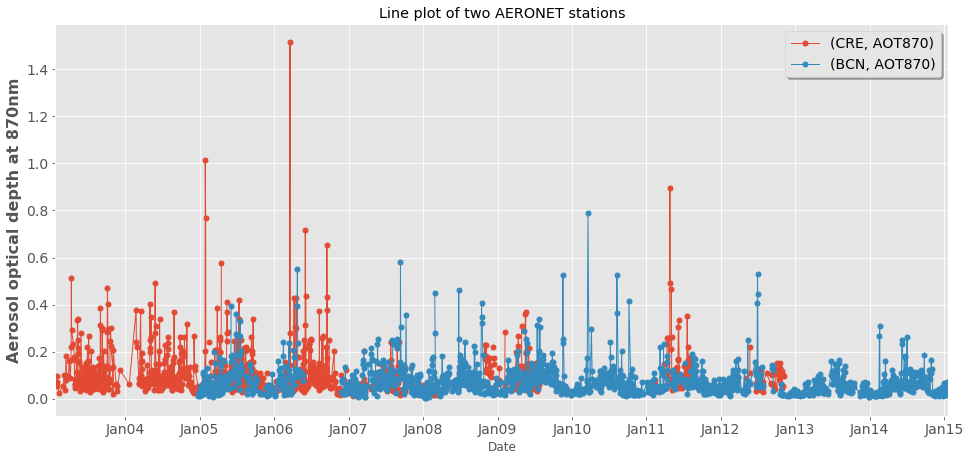

<Figure size 432x288 with 0 Axes>

In [82]:
#Line plots
ax=df1.plot(style='-o',markersize=5,linewidth=1.,figsize=(16,8),fontsize=14,title='Line plot of two AERONET stations',rot=0)

ax.set_ylabel('Aerosol optical depth at 870nm',fontweight='bold',fontsize=16) #y label

ax.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1) #Legend
ax.set_xticklabels(df1.index.year,ha='center') 
ax.xaxis.set_major_locator(dates.YearLocator()) #Sets automatically the years
ax.xaxis.set_major_formatter(dates.DateFormatter('%b%y')) #Define the dates format in xaxis

plt.show() #Show the figure on the screen
plt.clf() #Clear memory

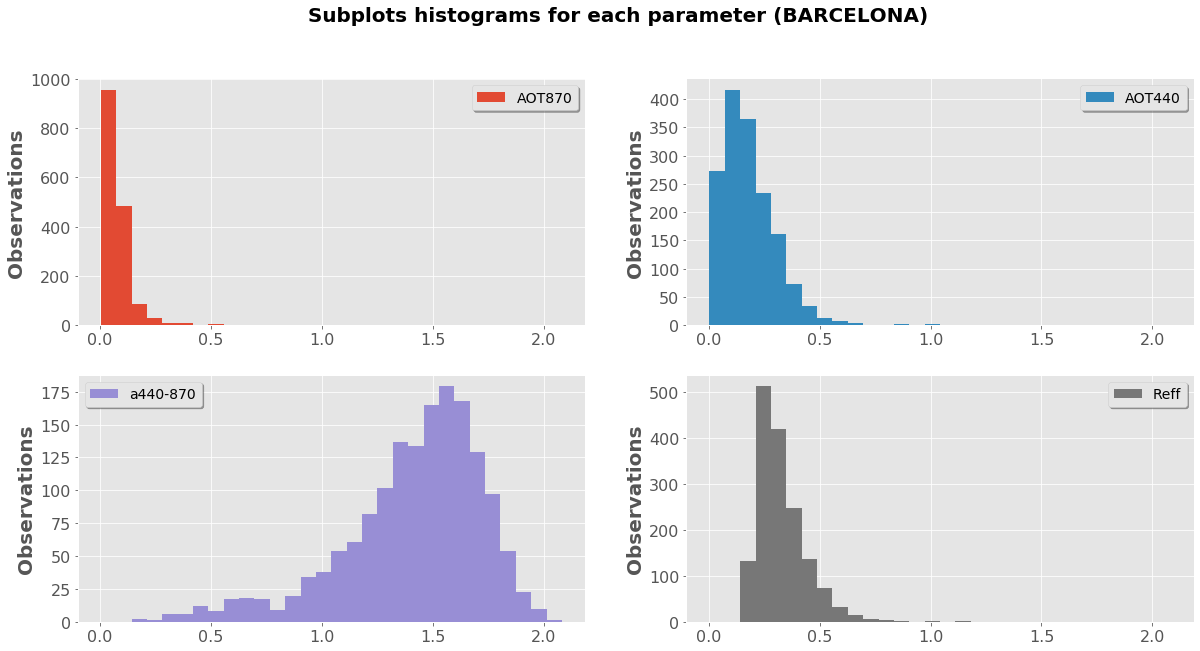

<Figure size 432x288 with 0 Axes>

In [85]:
#Subplots of histograms

ax4=df3.plot(kind='hist',subplots=True,layout=(2,2),
             figsize=(20,10),fontsize=16,bins=30,sharex=False)
#Modify figures' features in each position
for row in np.arange(ax4.shape[0]):
    for col in np.arange(ax4.shape[1]):
        
        ax4[row,col].set_xlabel('')
        ax4[row,col].set_ylabel('Observations',fontsize=20,fontweight='bold')
        ax4[row,col].legend(loc='best',fontsize=14,fancybox=True,
                            shadow=True,numpoints=1)
       

plt.suptitle('Subplots histograms for each parameter (BARCELONA)',fontsize=20,fontweight='bold')

plt.show()
plt.clf()

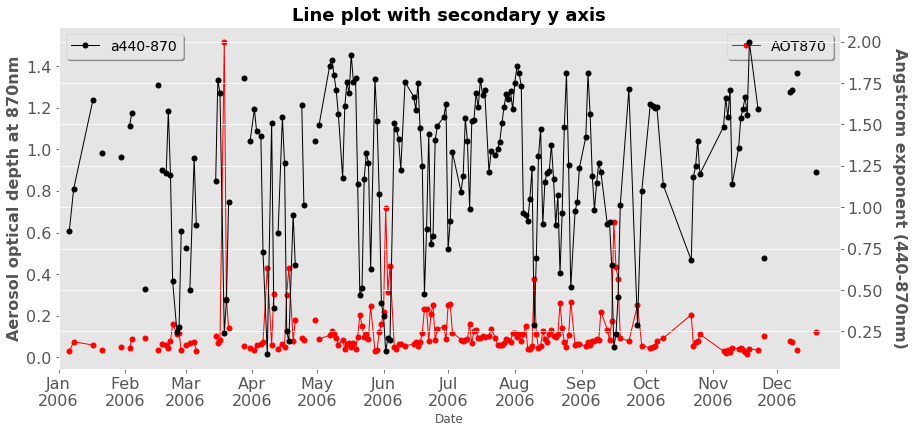

<Figure size 432x288 with 0 Axes>

In [83]:
#Line plots with second y-axis
plt.subplots(figsize=(14,7)) #Set the figure area

#Select year 2006
yearmask=AERONETmerg.index.year==2006 

##Plot two parameters from the AERONETmerg dataframe. The second one is plotted in the secondary_y axis
ax1=AERONETmerg['AOT870-CRE'][yearmask].plot(legend=True,style='r-o',markersize=5,linewidth=1.,label='AOT870')
ax2=AERONETmerg['a440-870-CRE'][yearmask].plot(secondary_y=True,style='k-o',legend=True,
                                               markersize=5,linewidth=1.,ax=ax1,label='a440-870')

#Plot figure's title
ax1.set_title('Line plot with secondary y axis',fontsize=18,fontweight='bold')

#Plot the two y labels
ax1.set_ylabel('Aerosol optical depth at 870nm',fontweight='bold',fontsize=16)
ax2.set_ylabel('Angstrom exponent (440-870nm)',fontweight='bold',fontsize=16,rotation=270,labelpad=25)

#Define the ticks size in both axes
ax1.tick_params(axis='both',labelsize=16)
ax2.tick_params(axis='both',labelsize=16)

#Set the legends for each parameter
ax1.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1)
ax2.legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1)

#Define the date format and set the position on xticks
ax1.set_xticklabels(AERONETmerg[yearmask].index.year,ha='center',rotation=0) #Modify the xticks
ax1.xaxis.set_major_locator(dates.MonthLocator()) #Sets automatically the months
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) #Define the dates format in xaxis

plt.show()
plt.clf()

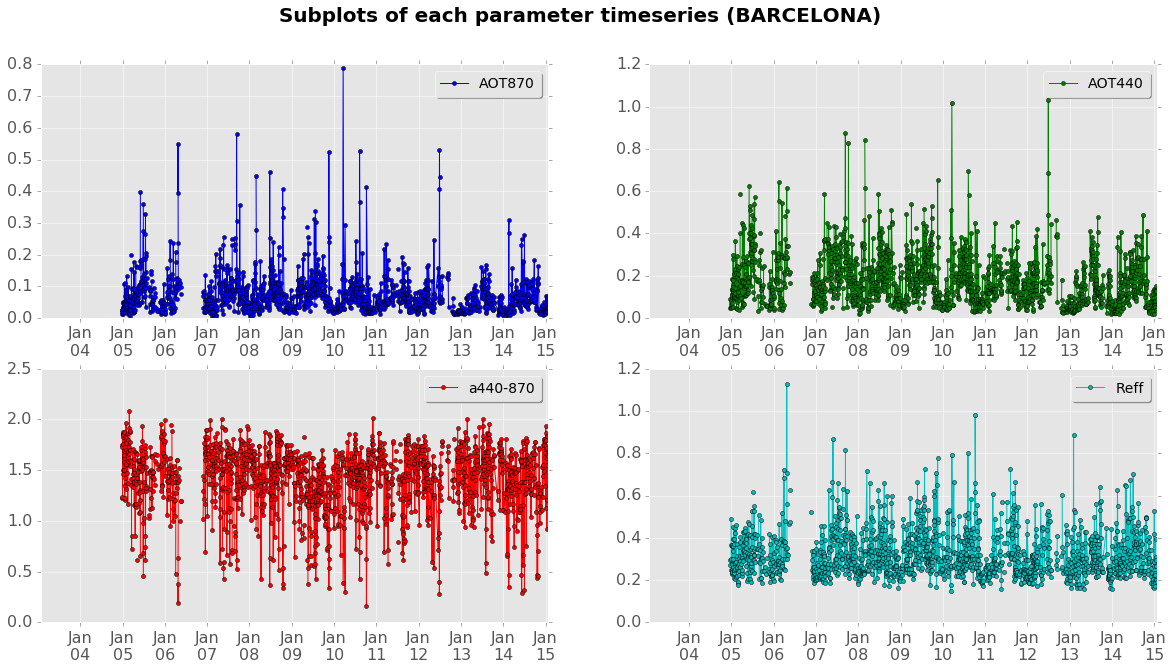

In [44]:
#Subplots of timeseries
ax3=df3.plot(subplots=True,layout=(2,2),figsize=(20,10),fontsize=16,style='-o',markersize=4,sharex=False)

#Modify figures' features in each subplot
for row in np.arange(ax3.shape[0]):
    for col in np.arange(ax3.shape[1]):
        
        ax3[row,col].set_xlabel('') #Remove the label in x axis
        ax3[row,col].legend(loc='best',fontsize=14,fancybox=True,shadow=True,numpoints=1) #Modify the legend
        ax3[row,col].set_xticklabels(df3.index.year,ha='center',rotation=0) #Modify the xticks
        ax3[row,col].xaxis.set_major_locator(dates.YearLocator()) #Sets automatically the years
        ax3[row,col].xaxis.set_major_formatter(dates.DateFormatter('%b\n%y'))
        
plt.suptitle('Subplots of each parameter timeseries (BARCELONA)',fontsize=20,fontweight='bold') #Plot figure's main title

plt.show()
plt.clf()

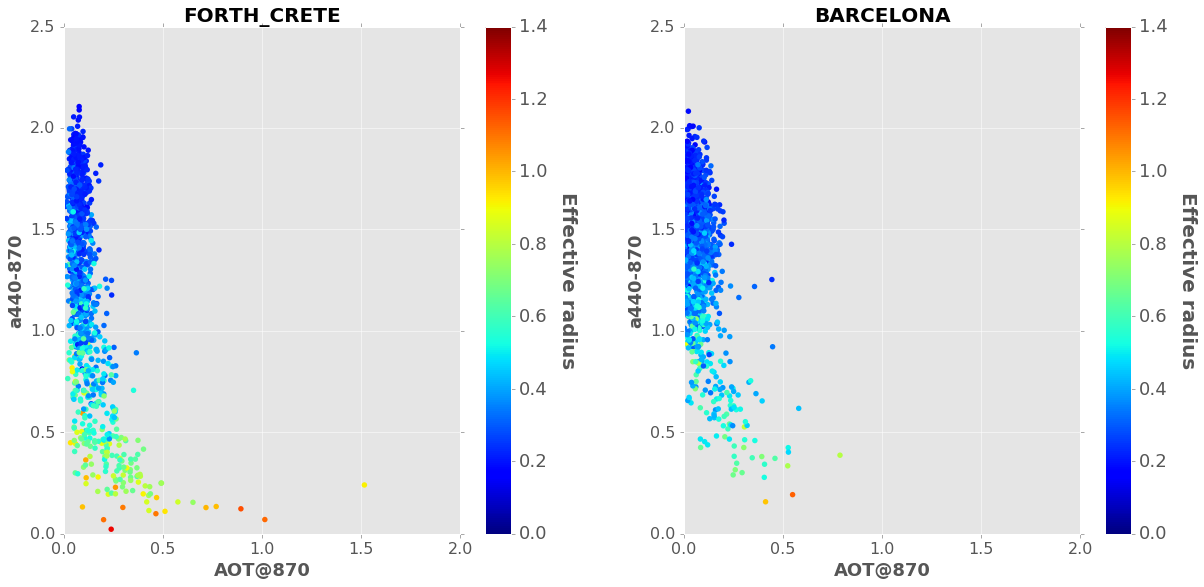

In [46]:
#Scatterplots

fig = plt.figure(figsize=(20,20)) #Define figure's features 
plt.subplots_adjust(wspace=0.25) #Adjust the space between the two subplots

#Define the parameters which are going to be used for the visualization of your scatterplots
cbarmin=0;cbarmax=1.4 #Set the minimum and the maximum values which will be used in colorbars
cbar='jet' #Colorbar style
cbarlabel='Effective radius' #Colorbar label
s=30 #Markersize
lw=0. #Thickness of line around the markers
xlabel='AOT@870' #Set the x labels
ylabel='a440-870' #Set the y labels
xmin=0.;xmax=2.;ymin=0.;ymax=2.5 #Set the minimum and maximum limits in x and y axes

#Normalize the colors in the colorbar
norm = mpl.colors.Normalize(vmin=cbarmin, vmax=cbarmax)

#FIRST SUBPLOT (left side)
ax1 = fig.add_subplot(221) #Define the first subplot

#Set the title in the first subplot
ax1.set_title('FORTH_CRETE',fontsize=20,fontweight='bold')

#Plot the scatterplot in the first subplot (the name of this object is scatCRE)
scatCRE=ax1.scatter(AERONETmerg['AOT870-CRE'],AERONETmerg['a440-870-CRE'],c=AERONETmerg['Reff-CRE'],
                    norm=norm,cmap=cbar,s=s,lw=lw)

#Add the colorbar in the object scatCRE (scatterplot for CRE)
cb1 = plt.colorbar(scatCRE,norm=norm) 

cb1.set_label(cbarlabel, fontsize=20, fontweight='bold',rotation=270,labelpad=30) #Set colorbar label
cb1.set_clim(cbarmin,cbarmax) #Set colorbar limits
cb1.set_ticks(np.linspace(cbarmin,cbarmax,8)) #Define ticks position in the colorbar
cb1.ax.tick_params(labelsize=18) #Define the size of number in colorbar

ax1.tick_params(labelsize=16) #Size of the tick labels

ax1.set_xlim(xmin,xmax) #Set limits on x-axis
ax1.set_ylim(ymin,ymax) #Set limits on y-axis

ax1.set_xlabel(xlabel,fontsize=18,fontweight='bold') #Set x-axis label
ax1.set_ylabel(ylabel,fontsize=18,fontweight='bold') #Set y-axis label


#SECOND SUBPLOT (right side)
ax2 = fig.add_subplot(222) #Define the second subplot

ax2.set_title('BARCELONA',fontsize=20,fontweight='bold') #Set the title in the second subplot

#Plot the scatterplot in the first subplot (the name of this object is scatCRE)
scatBCN=ax2.scatter(AERONETmerg['AOT870-BCN'],AERONETmerg['a440-870-BCN'],c=AERONETmerg['Reff-BCN'],
                    norm=norm,cmap=cbar,s=s,lw=lw)

cb2 = plt.colorbar(scatBCN,norm=norm) #Add the colorbar in the object scatBCN (scatterplot for BCN)

cb2.set_label(cbarlabel, fontsize=20, fontweight='bold',rotation=270,labelpad=30)  #Set colorbar label
cb2.set_clim(cbarmin,cbarmax) #Set colorbar limits
cb2.set_ticks(np.linspace(cbarmin,cbarmax,8)) #Define ticks position in the colorbar
cb2.ax.tick_params(labelsize=18) #Define the size of number in colorbar

ax2.tick_params(labelsize=16) #Size of the tick labels

ax2.set_xlim(xmin,xmax) #Set limits on x-axis
ax2.set_ylim(ymin,ymax) #Set limits on y-axis

ax2.set_xlabel(xlabel,fontsize=18,fontweight='bold') #Set x-axis label
ax2.set_ylabel(ylabel,fontsize=18,fontweight='bold') #Set y-axis label

plt.show()
plt.clf()

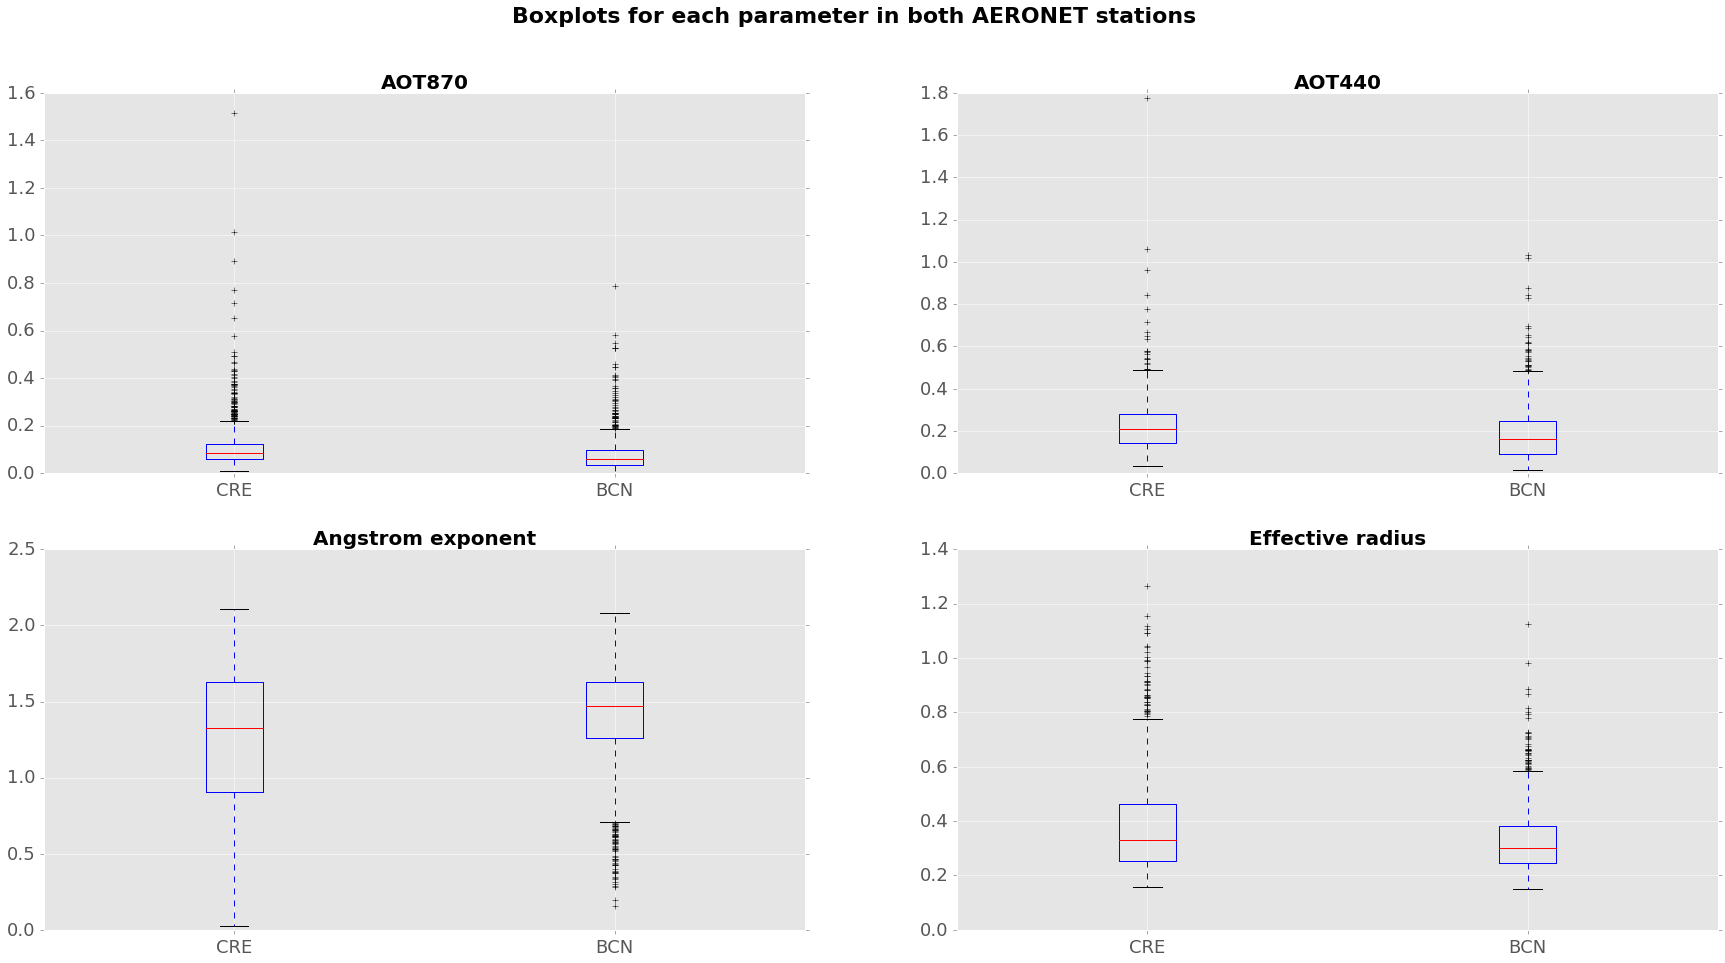

In [47]:
##Boxplots
fig, ax = plt.subplots(2, 2,figsize=(30,15)) #Define figure's features
plt.subplots_adjust(wspace=0.2,hspace=0.2) #Adjust spaces between subplots

#Set figure's title
fig.suptitle('Boxplots for each parameter in both AERONET stations',fontsize=22,fontweight='bold')

#Boxplots for each parameter in each subplot
AERONETconc.xs('AOT870',level='Parameter',axis=1).plot(kind='box',ax=ax[0,0],fontsize=18)
AERONETconc.xs('AOT440',level='Parameter',axis=1).plot(kind='box',ax=ax[0,1],fontsize=18)
AERONETconc.xs('a440-870',level='Parameter',axis=1).plot(kind='box',ax=ax[1,0],fontsize=18)
AERONETconc.xs('Reff',level='Parameter',axis=1).plot(kind='box',ax=ax[1,1],fontsize=18)

#Set title in each subplot
ax[0,0].set_title('AOT870',fontsize=20,fontweight='bold')
ax[0,1].set_title('AOT440',fontsize=20,fontweight='bold')
ax[1,0].set_title('Angstrom exponent',fontsize=20,fontweight='bold')
ax[1,1].set_title('Effective radius',fontsize=20,fontweight='bold')

plt.show()
plt.clf()

# Functions describe(), resample() and groupby()

In [86]:
#Calculate the overall statistics of a dataframe (AERONETconc)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
pstats=AERONETconc.describe()
print(pstats)

Station            CRE                                                 BCN  \
Parameter       AOT870       AOT440     a440-870         Reff       AOT870   
count      1106.000000  1106.000000  1106.000000  1106.000000  1584.000000   
mean          0.110611     0.225370     1.234253     0.385570     0.075462   
std           0.100966     0.121585     0.483087     0.181841     0.065934   
min           0.010285     0.033217     0.022577     0.157000     0.003142   
25%           0.058233     0.141098     0.908266     0.252050     0.034505   
50%           0.083130     0.207785     1.329322     0.330500     0.060825   
75%           0.122754     0.279389     1.628155     0.464562     0.095717   
max           1.516289     1.777483     2.105658     1.264000     0.788406   

Station                                           
Parameter       AOT440     a440-870         Reff  
count      1584.000000  1584.000000  1584.000000  
mean          0.184029     1.410716     0.327224  
std           0

In [87]:
#Write the outputs to a csv file
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

pstats.to_csv('AERONET-primary-statistics-results.txt',sep='\t',float_format='%10.3f')

In [48]:
print(AERONETconc.describe(percentiles=[0.05,0.25,0.75,0.95]))

Station            CRE                                                 BCN  \
Parameter       AOT870       AOT440     a440-870         Reff       AOT870   
count      1106.000000  1106.000000  1106.000000  1106.000000  1584.000000   
mean          0.110611     0.225370     1.234253     0.385570     0.075462   
std           0.100966     0.121585     0.483087     0.181841     0.065934   
min           0.010285     0.033217     0.022577     0.157000     0.003142   
5%            0.033893     0.083801     0.318030     0.201375     0.017144   
25%           0.058233     0.141098     0.908266     0.252050     0.034505   
50%           0.083130     0.207785     1.329322     0.330500     0.060825   
75%           0.122754     0.279389     1.628155     0.464562     0.095717   
95%           0.279979     0.420926     1.861167     0.760500     0.180633   
max           1.516289     1.777483     2.105658     1.264000     0.788406   

Station                                           
Parameter   

In [90]:
#Calculate monthly means from a dataframe (AERONETconc)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
print(AERONETconc.resample('MS',how='std')) #Monthly mean values

Station          CRE                                     BCN            \
Parameter     AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                     
2003-01-01  0.001684  0.048033  0.667290  0.138164       NaN       NaN   
2003-02-01  0.035127  0.020764  0.686221  0.290106       NaN       NaN   
2003-03-01  0.045904  0.137255  0.261110  0.088771       NaN       NaN   
2003-04-01  0.136802  0.141665  0.621361  0.238532       NaN       NaN   
2003-05-01  0.091520  0.101202  0.411468  0.146491       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2014-09-01       NaN       NaN       NaN       NaN  0.042123  0.116619   
2014-10-01       NaN       NaN       NaN       NaN  0.042791  0.099593   
2014-11-01       NaN       NaN       NaN       NaN  0.034446  0.080120   
2014-12-01       NaN       NaN       NaN       NaN  0.011345  0.032433   
2015-01-01       NaN       NaN       N

/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()
  after removing the cwd from sys.path.


In [91]:
print(AERONETconc.resample('MS',how='count')) #Monthly counts

Station       CRE                         BCN                     
Parameter  AOT870 AOT440 a440-870 Reff AOT870 AOT440 a440-870 Reff
Date                                                              
2003-01-01      3      3        3    3      0      0        0    0
2003-02-01      3      3        3    3      0      0        0    0
2003-03-01      9      9        9    9      0      0        0    0
2003-04-01     11     11       11   11      0      0        0    0
2003-05-01     23     23       23   23      0      0        0    0
...           ...    ...      ...  ...    ...    ...      ...  ...
2014-09-01      0      0        0    0     10     10       10   10
2014-10-01      0      0        0    0     13     13       13   13
2014-11-01      0      0        0    0     10     10       10   10
2014-12-01      0      0        0    0     15     15       15   15
2015-01-01      0      0        0    0     15     15       15   15

[145 rows x 8 columns]


/home/chloe/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


In [92]:
#Calculate the intra-annual variability
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
print(AERONETconc.groupby(AERONETconc.index.month).mean())

Station         CRE                                     BCN            \
Parameter    AOT870    AOT440  a440-870      Reff    AOT870    AOT440   
Date                                                                    
1          0.102878  0.153603  1.035771  0.538458  0.040414  0.115003   
2          0.090498  0.152296  1.052885  0.508833  0.062890  0.165530   
3          0.117638  0.222085  1.196238  0.436591  0.071323  0.175201   
4          0.148939  0.243599  0.984967  0.449306  0.093210  0.212999   
5          0.133463  0.240350  1.078601  0.388373  0.075932  0.176770   
6          0.097473  0.223437  1.390693  0.296029  0.117619  0.271443   
7          0.100673  0.243431  1.401651  0.292091  0.100539  0.244888   
8          0.100576  0.238869  1.381097  0.329475  0.097926  0.228471   
9          0.121152  0.245859  1.242526  0.424806  0.088790  0.227885   
10         0.123421  0.229320  1.077237  0.504771  0.076692  0.173142   
11         0.074947  0.147103  1.129972  0.502915  

# Useful weblinks
* Pandas tutorial: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
* Timeseries/Date functionality: http://pandas.pydata.org/pandas-docs/stable/timeseries.html
* Timeseries analysis: 
    * http://earthpy.org/pandas-basics.html
    * http://earthpy.org/time_series_analysis_with_pandas_part_2.html
    * https://www.youtube.com/watch?v=0unf-C-pBYE
* Data analysis with pandas: https://www.youtube.com/watch?v=w26x-z-BdWQ
* Seaborn library (plots visualization):
    * https://stanford.edu/~mwaskom/software/seaborn/introduction.html
    * http://earthpy.org/category/visualization.html